<a href="https://colab.research.google.com/github/gaabs-batista/VGG16_animaldetect/blob/main/VGG16_AnimaisDetec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


# TRABALHO VGG-16

##Alunas: Gabriela Batista e Geovana Silva

## Justificativa

Pensando na quantidade preocupante de animais abandonados em rodovias e estradas que acontece diariamente, nosso trabalho propõe o desenvolvimento de um sistema equipado com visão computacional e a arquitetura VGG-16 para a detecção e classificação de cachorros e gatos nessas áreas. O objetivo é mapear os casos de abandono, quantificando de forma precisa o número de animais abandonados, possibilitando análise e criação de estratégias para minimização dos casos.

Visto que o abandono de animais é crime previsto em lei, o sistema também poderia ajudar na identificação dos responsáveis por tais crimes ao ser integrado em hardwares como câmeras de segurança, por exemplo, que se comunicariam diretamente com os radares de detecção de placas que já existem nas estradas. Assim, seria possível identificar os veículos associados aos criminosos, facilitando o trabalho das autoridades na identificação e nas ações de combate à prática criminosa.

## Referências

[InvesTime - Deep-learning in Health care || Image Classification using(VGG16)](https://github.com/AarohiSingla/VGG-16/blob/main/.ipynb_checkpoints/vggnet_with_keras_own_dataset-checkpoint.ipynb)

[Robôs, Sensores e Aplicações - VGG16 (Classificação de pessoas armadas)](https://www.youtube.com/watch?v=O5HxVtPMCiA)



**Vídeo Explicativo**
https://youtu.be/cDTANvqyOBI


# Usando modelo pré existente do VGG16

In [1]:
!pip install matplotlib==3.7.1

import numpy
from keras.applications.vgg16 import VGG16
from matplotlib.pyplot import imread, imshow
from keras.preprocessing.image import load_img
from keras.applications.imagenet_utils import preprocess_input

model = VGG16()
model.summary()   # visualizar as 16 camadas do modelo

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

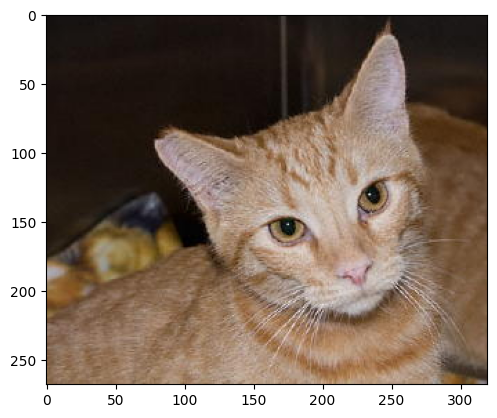

In [4]:
# carregar imagem
image = load_img('/content/drive/MyDrive/Gatos/14.jpg', target_size=(224, 224))

# converter pixels da image para array numpy
image = numpy.array(image)

# preparar imagem para trabalhar com VGG16
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)

preImage = imread('/content/drive/MyDrive/Gatos/14.jpg')
imshow(preImage)

## Aplicando predição

Usando modelos já existente do VGG16 para obter predição do conteúdo da imagem.

In [5]:
from keras.applications.vgg16 import preprocess_input, decode_predictions

yhat = model.predict(image)
label = decode_predictions(yhat)
label

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n02124075', 'Egyptian_cat', 0.51731867),
  ('n02123159', 'tiger_cat', 0.13537821),
  ('n02123045', 'tabby', 0.11772153),
  ('n02127052', 'lynx', 0.050722186),
  ('n02971356', 'carton', 0.031913947)]]

# Aplicando ao tema escolhido

In [9]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from keras.applications import vgg16
from keras.models import Sequential, Model
from keras.layers import Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Convolution2D, Dropout, Dense, MaxPooling2D
from keras.layers import MaxPooling2D, BatchNormalization, Conv2D, ZeroPadding2D

100%|██████████| 101/101 [00:01<00:00, 53.89it/s]


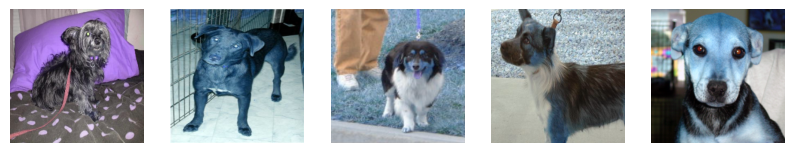

In [10]:
X = []
y = []

Cachorros_dir = '/content/drive/MyDrive/Cachorros'
Gatos_dir = '/content/drive/MyDrive/Gatos'

os.chdir(Cachorros_dir)
for i in tqdm(os.listdir()):
  img_path = os.path.join(Cachorros_dir, i)
  img = cv2.imread(img_path)
  # verificar se a imagem foi carregada
  if img is not None:
    img = cv2.resize(img, (224, 224))
    X.append(img)
    y.append('Cachorro')

os.chdir(Gatos_dir)
for i in tqdm(os.listdir()):
  img_path = os.path.join(Gatos_dir, i)
  img = cv2.imread(img_path)
  # verificar se a imagem foi carregada
  if img is not None:
    img = cv2.resize(img,(224,224))
    X.append(img)
    y.append('Gato')

plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

In [11]:
# print(X)
print(y)

['Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Ca

In [12]:
#33% teste     77%treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

le = preprocessing.LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)

print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)
X_train Shape:  (135, 224, 224, 3)
X_test Shape:  (67, 224, 224, 3)
y_train Shape:  (135, 2)
y_test Shape:  (67, 2)


In [29]:
num_classes = 2
img_rows, img_cols = 224, 224

vgg = vgg16.VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (img_rows, img_cols, 3))

# Here we freeze the last 4 layers
# Layers are set to trainable as True by default
for layer in vgg.layers:
  layer.trainable = False


# Let's print our layers
for (i,layer) in enumerate(vgg.layers):

  def lw(bottom_model, num_classes):
    """creates the top or head of the model that will be
    placed ontop of the bottom layers"""

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)

    return top_model


FC_Head = lw(vgg, num_classes)
model = Model(inputs = vgg.input, outputs = FC_Head)

print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │         525,3

 Total params: 16,815,426 (64.15 MB)

 Trainable params: 2,100,738 (8.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 133s 28s/step - accuracy: 0.5409 - loss: 8.2476 - val_accuracy: 0.8358 - val_loss: 0.6998
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 180s 37s/step - accuracy: 0.9415 - loss: 0.2001 - val_accuracy: 0.9851 - val_loss: 0.0375
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 164s 27s/step - accuracy: 0.9870 - loss: 0.0914 - val_accuracy: 0.8955 - val_loss: 0.5413
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 142s 28s/step - accuracy: 0.9867 - loss: 0.0329 - val_accuracy: 0.9701 - val_loss: 0.0541
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 140s 27s/step - accuracy: 0.9962 - loss: 0.0058 - val_accuracy: 0.9104 - val_loss: 0.3638


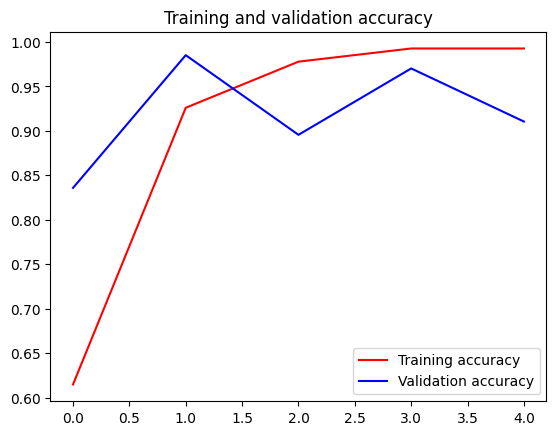

<Figure size 640x480 with 0 Axes>

In [30]:
from tensorflow.keras.models import Model

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=5,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    initial_epoch=0)

loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

## Teste !
 Para realização do teste, foi utilizada 3 imagens de animais diferentes, sendo elas:
  
*   Cachorro
*   Gato
*   Tatu

Como o intuíto do nosso modelo é detectar animais (Cachorros e Gatos) que são abandonados nas rodovias, foi inserido para teste de detecção o Tatu, animal esse que tem um alto índice de morte por atropelamento, consequentemente poderia ser facilmente confundido com um dos nossos objetos de interesse.





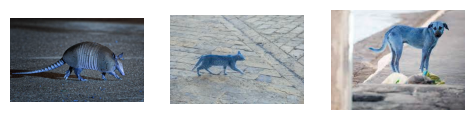

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted label: Cachorros e Gatos, Probability: 0.9777803
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
Predicted label: Cachorros e Gatos, Probability: 0.94171107
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step
Predicted label: Cachorros e Gatos, Probability: 1.0


In [31]:
preImages = ["/content/drive/MyDrive/tatu.JPG",
             "/content/drive/MyDrive/gato.JPG",
             "/content/drive/MyDrive/cachorro.jpeg"]



plt.figure(figsize=(10, 10))
for i in range(3):
    plt.subplot(1, 5, i+1)
    img = cv2.imread(preImages[i])
    plt.imshow(img, cmap="gray")
    plt.axis('off')
plt.show()

for index, image_dir in enumerate(preImages):
  # carregar imagem
  image = load_img(image_dir, target_size=(224, 224))

  # converter pixels da image para array numpy
  image = numpy.array(image)

  # preparar imagem para trabalhar com VGG16
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  image = preprocess_input(image)

  yhat = model.predict(image)

  # Obter index da classe com maior probabilidade
  predicted_class = np.argmax(yhat)

  # Obter probabilidade das duas classes (armado | desarmado)
  probabilities = yhat[0]

  # Exibir resultado de probabilidade de cada imagem
  if predicted_class == 0:
      print("Predicted label: Cachorros e Gatos, Probability:", probabilities[0])
  else:
     print("Predicted label: Outros Animais, Probability:", probabilities[1])

**Conclusão:**

  Analisando os resultados, apesar de ter acertado na detecção da classe de "Outros Animais", a probablilidade chegou muito próxima do limite de detecção de "Cachorros e Gatos", devido a estrutura física do Tatu.
